In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re
import random
import pickle

In [2]:
df=pd.read_csv('cleanTweets_pred_prob_BJP_CONG.csv',na_values={'None','NONE'})

df=df.replace(r'^\s*$', np.nan, regex=True)
df=df.fillna('')

In [39]:
print(len(df.loc[df.index[df['congress']==1]]))
print(len(df.loc[df.index[df['bjp']==1]]))

78975
169705


In [2]:
fp = 'district_shp'
map_df = gpd.read_file(fp) #reading shapefile as dataframe

map_df['DISTRICT']=map_df.apply(lambda arg: arg['DISTRICT'].lower(),axis=1)
map_df['ST_NM']=map_df.apply(lambda arg: arg['ST_NM'].lower(),axis=1)

In [5]:
dt=dict()

for i in np.arange(0,641):
        d_name=map_df.loc[i,:]['DISTRICT']
        dt[d_name]=i #associating each district name to a unique value
        
  

#below, alias of same district are all made to have same value
dt['delhi']=dt['new delhi']
dt['dadara and nagar havelli']=dt['dadra & nagar haveli']
dt['dadra and nagar havelli']=dt['dadra & nagar haveli']
dt['andaman']=dt['north & middle andaman']
dt['pondicherry']=dt['puducherry']
dt['banglore']=dt['bangalore']
dt['bengalore']=dt['bangalore']
dt['ahmedabad']=dt['ahmadabad']
dt['ahamedabad']=dt['ahmadabad']
dt['ahemedabad']=dt['ahmadabad']
dt['ahemadabad']=dt['ahmadabad']

In [129]:
#eg district delhi has been assigned value 409
s='delhi'
print(dt[s.lower()])

409


In [6]:
df_=df.copy()

#state_list=['']
t=time()
count=0
def get_district_id(arg):#this function returns possible district id for a given location 
    for e in arg['loc_tokens']:
        try:
            i=dt[e]
            return i
        
        except:
            pass
        
    return -1
    
df_['district_id']=df_.apply(get_district_id, axis=1)
            
print(time()-t)  

11.396479845046997


In [7]:
#no of tweets with identifiable districts
print(len(df_.loc[df_.index[df_['district_id']!=-1]]))

208624


In [149]:
df_bjp=df_.loc[df_.index[df_['bjp']==1]].copy()
df_congress=df_.loc[df_.index[df_['congress']==1]].copy()

df_bjp=df_bjp.reset_index(drop=True)
df_congress=df_congress.reset_index(drop=True)

df_=df_.loc[df_.index[ (df_['bjp'] + df_['congress'])!=0 ]] #retain only tweets which are either bjp or congress related 
                                                            #i.e mutually exclusive in terms of political parties 

In [96]:
#no of tweets that are exclusively related to bjp or congress and also have identifiable districts
print(len(df_bjp.loc[df_bjp.index[df_bjp['district_id']!=-1]]))

print(len(df_congress.loc[df_congress.index[df_congress['district_id']!=-1]]))

97345
45108


In [97]:
print(len(df_))

248680


In [155]:
l1=[]
l2=[]
l3=[]

for i in np.arange(0,641):
    l=len(df_.loc[df_.index[df_['state_ind']==i]])#total tweets from ith district
    
    #d=df_bjp.loc[df_bjp.index[df_bjp['state_ind']==i]].copy()#get all bjp related tweets from ith district
    d=df_congress.loc[df_congress.index[df_congress['state_ind']==i]].copy()#get all congress related tweets from ith district

    if l!=0: #here l1,l2 and l3 are sentiment intensities (for positive, negative and neutral resptv) per district
        l1.append(len(d.loc[d.index[d['pred']=='pos']])/l)
        l2.append(len(d.loc[d.index[d['pred']=='neg']])/l)
        l3.append(len(d.loc[d.index[d['pred']=='neu']])/l)
    else: #intensity used is -0.5 for a district with no tweets 
        l1.append(-0.5)
        l2.append(-0.5)
        l3.append(-0.5)

    
print(len(l1))
print(len(l2))
print(len(l3))


map_df['pos_count']=list(map(lambda arg: arg if arg!=0 else -0.5,l1))
map_df['neg_count']=list(map(lambda arg: arg if arg!=0 else -0.5,l2))
map_df['neu_count']=list(map(lambda arg: arg if arg!=0 else -0.5,l3))

641
641
641


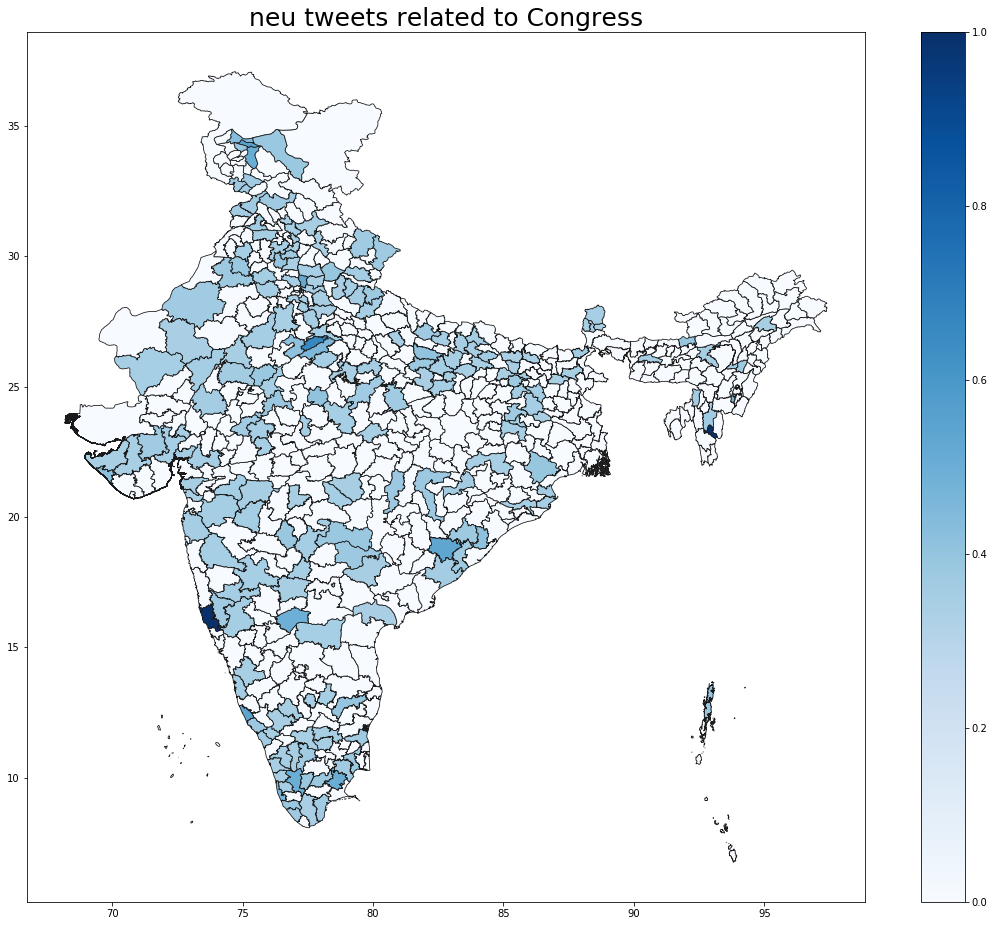

In [159]:
vmin, vmax = 0,1
fig, ax = plt.subplots(1, figsize=(20, 16))

str_='neu'
sc='Blues'
map_df.plot(column=(str_+'_count'),cmap=sc, linewidth=0.8, edgecolor='0.1',ax=ax)
ax.set_title(str_+' tweets related to Congress', fontdict={'fontsize': '25', 'fontweight' : '3'})
 
sm = plt.cm.ScalarMappable(cmap=sc, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

#Similarly by changing str_ to neg, pos we can get negative and positive tweets related to congress
#Also, to get the same for bjp simple df_bjp in previous code block